## 🕶 Awesome Visualization with Titanic Dataset📊

### Please be sure to leave a reference when using code or taking ideas in my visualizations.

![](https://images.squarespace-cdn.com/content/v1/5006453fe4b09ef2252ba068/1351392437993-BV9HK0L2V72X9FA05IOP/ke17ZwdGBToddI8pDm48kNWCohGJSet_CTOduKgSq_IUqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8N_N4V1vUb5AoIIIbLZhVYxCRW4BPu10St3TBAUQYVKcq9E8CIbGv7FsN6c8xqWQM05n26OV6V51zLkOg8VQq3jPVEm2DFIE48zJj5Gl4vDf/Titanic_Blueprints_Design+%2815%29.gif)

I am one of the Kagglers who **love** visualization.

For those of you who are tired of the excessive Titanic Dataset, I will create a higher quality visualization.

I particularly pay attention to **color** and **placement**. 
Also, I am studying how to proceed with visualization without misunderstanding of interpretation.

> **Goal** : Let's create ***The Economist***-style visualization material with only python basic library **matplotlib & seaborn**

**Have fun and if you liked it, please upvote!**

---

### Table of Contents

- **Timeline visualization** : Matplotlib Techniques
- **Ridgeplot** : Effective Multi Distribution
- **Barplot** : How to Customize Bar?
- **Stripplot** : Effective distribution plot
- **Heatmap** : How t Custom Heatmap?
- **Dimension Reduction + Scatter**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install seaborn==0.11.0

     |████████████████████████████████| 283 kB 6.0 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
from matplotlib.ticker import FuncFormatter

import seaborn as sns

import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/csv file/train.csv')
data.shape

(891, 12)

## Awesome Timeline Visualization

- A **Timeline** is a graphical way of displaying a list of events in chronological order. 
- line + scatter + **stem plot**

---

### Simple Explanation

- First of all, the ingredients are:
    - a line
    - 3 data points
        - 2 point set of date
            - black one, white one
        - 1 point set of time
    - vertical lines which matching with time (stem plot)

- The downside is that the process of adjusting text position is heuristic.

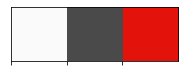

In [ ]:
sns.palplot(['#fafafa', '#4a4a4a', '#e3120b'])

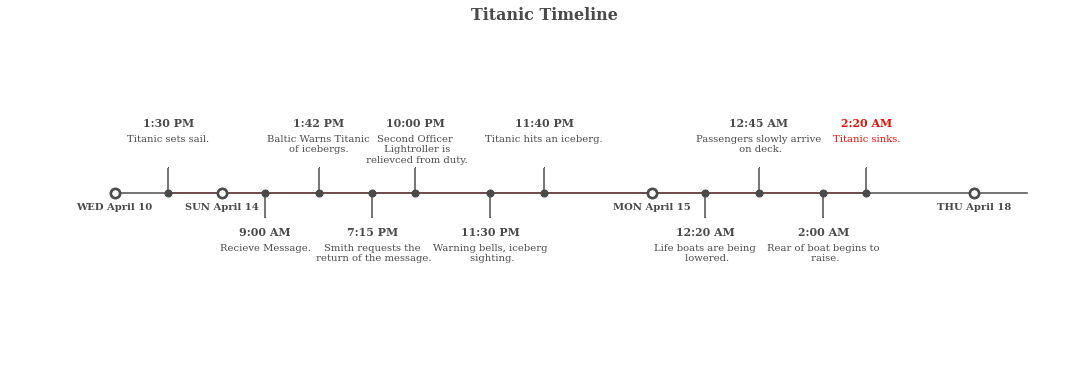

In [ ]:
from datetime import datetime


tl_dates = [
    "WED April 10",
    "SUN April 14",
    "MON April 15",
    "THU April 18"
]

tl_x = [1, 2, 6, 9]

tl_sub_x = [1.5, 2.4, 2.9, 3.4, 3.8, 4.5, 5.0, 6.5, 7, 7.6, 8]
tl_sub_times = [
    "1:30 PM",
    "9:00 AM",
    "1:42 PM",
    "7:15 PM",
    "10:00 PM",
    "11:30 PM",
    "11:40 PM",
    "12:20 AM",
    "12:45 AM",
    "2:00 AM",
    "2:20 AM",
]

tl_text = [
    "Titanic sets sail.",
    "Recieve Message.",
    "Baltic Warns Titanic\nof icebergs.", 
    "Smith requests the\n return of the message.",
    "Second Officer\n Lightroller is\n relievced from duty.",
    "Warning bells, iceberg\n sighting.",
    "Titanic hits an iceberg.",
    "Life boats are being\n lowered.",
    "Passengers slowly arrive\n on deck.",
    "Rear of boat begins to\n raise.",
    "Titanic sinks."
]

# Set figure & Axes
fig, ax = plt.subplots(figsize=(15, 5), constrained_layout=True)
ax.set_ylim(-2, 2)
ax.set_xlim(0, 10)


# Timeline : line
ax.axhline(0, xmin=0.1, xmax=0.95, c='#4a4a4a', zorder=1)
# Timeline : Date Points
ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)
# Timeline : Time Points
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a',zorder=4)

# Date Text
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.2, date, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a')
    

# Stemplot : vertical line
levels = np.zeros(len(tl_sub_x))    
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)    
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')

# Text
for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3*(idx%2)-0.5, time, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a' if idx!=len(tl_sub_x) else '#e3120b', fontsize=11)
    
    ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center', 
        fontfamily='serif',color='#4a4a4a' if idx!=len(tl_sub_x) else '#e3120b')

# Spine
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Ticks    
ax.set_xticks([]) 
ax.set_yticks([]) 

# Title
ax.set_title("Titanic Timeline", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')

plt.show()

## Awesome Distribution Visualization (Ridgeplot)
 
 - A **Ridgeline** plot (sometimes called Joyplot) shows the distribution of a numeric value for several groups.
- **library** : matplotlib, seaborn
- **colortheme** from movie "Snowpiercer" (because of *class*)

---

### Simple Explanation

- **Step1** : Use Gridspec
- **Step2** : Create density plot using seaborn's kdeplot
    - `bw` : bandwidth
    - `edgecolor` : to separate each density plot
    - `alpha` : remove transparency 
    - `cut` : clear meaning
- **Step3** : Remove ticks & labels except last xticks
- **Step4** : Remove Spine
- **Step5** : Make plots closer & Make the background transparent
- **Step6** : add subtext (figure title, axes title)

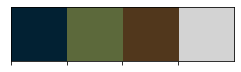

In [ ]:
sns.palplot(["#022133", "#5c693b", "#51371c", "lightgray"])

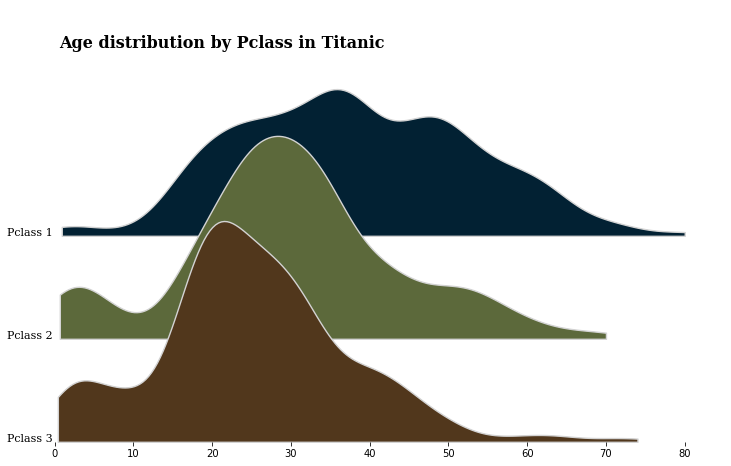

In [ ]:
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(3,1)
gs.update(hspace= -0.55)

axes = list()
colors = ["#022133", "#5c693b", "#51371c"]

for idx, cls, c in zip(range(3), sorted(data['Pclass'].unique()), colors):
    axes.append(fig.add_subplot(gs[idx, 0]))
    
    # you can also draw density plot with matplotlib + scipy.
    sns.kdeplot(x='Age', data=data[data['Pclass']==cls], 
                fill=True, ax=axes[idx], cut=0, bw_method=0.25, 
                lw=1.4, edgecolor='lightgray',color=c, alpha=1) 
    
    axes[idx].set_ylim(0, 0.04)
    axes[idx].set_xlim(0, 85)
    
    axes[idx].set_yticks([])
    if idx != 2 : axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')
    
    spines = ["top","right","left","bottom"]
    for s in spines:
        axes[idx].spines[s].set_visible(False)
        
    axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2,0,f'Pclass {cls}',fontweight="light", fontfamily='serif', fontsize=11,ha="right")

fig.text(0.13,0.81,"Age distribution by Pclass in Titanic", fontweight="bold", fontfamily='serif', fontsize=16)
plt.show()    

Changed the color of the graph above to give it a **glacier** texture whether it is a survivor or not.

In [ ]:
sns.color_palette(sns.color_palette("PuBu", 2))

[(0.7058823529411765, 0.7673202614379085, 0.873202614379085),
 (0.1477124183006536, 0.5228758169934641, 0.7320261437908496)]

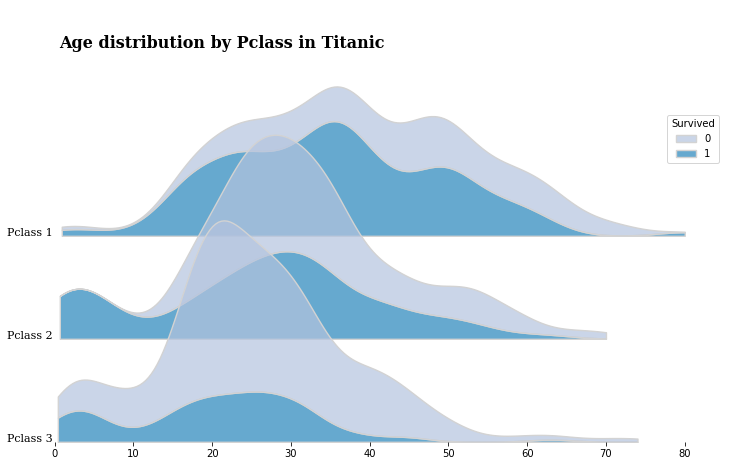

In [ ]:
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(3,1)
gs.update(hspace= -0.55)

axes = list()
colors = ["#022133", "#5c693b", "#51371c"]

for idx, cls, c in zip(range(3), sorted(data['Pclass'].unique()), colors):
    axes.append(fig.add_subplot(gs[idx, 0]))
    
    # you can also draw density plot with matplotlib + scipy.
    sns.kdeplot(x='Age', data=data[data['Pclass']==cls], 
                fill=True, ax=axes[idx], cut=0, bw_method=0.25, 
                lw=1.4, edgecolor='lightgray', hue='Survived', 
                multiple="stack", palette='PuBu', alpha=0.7
               ) 
    
    axes[idx].set_ylim(0, 0.04)
    axes[idx].set_xlim(0, 85)
    
    axes[idx].set_yticks([])
    if idx != 2 : axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')
    
    spines = ["top","right","left","bottom"]
    for s in spines:
        axes[idx].spines[s].set_visible(False)
        
    axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2,0,f'Pclass {cls}',fontweight="light", fontfamily='serif', fontsize=11,ha="right")
    if idx != 1 : axes[idx].get_legend().remove()
        
fig.text(0.13,0.81,"Age distribution by Pclass in Titanic", fontweight="bold", fontfamily='serif', fontsize=16)

plt.show()    

## Awesome Barplot Visualization

- **library** : matplotlib, seaborn
- **colortheme** from [The Economist Colors](https://pattern-library.economist.com/color.html)

---

### Simple Explanation

1. Grid
2. Color difference in the bar you want to emphasize
3. Average line and text annotations for it
4. Minimize the y-axis information and add it as an annotation to each bar

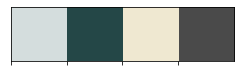

In [ ]:
sns.palplot(['#d4dddd', '#244747', '#efe8d1', '#4a4a4a'])

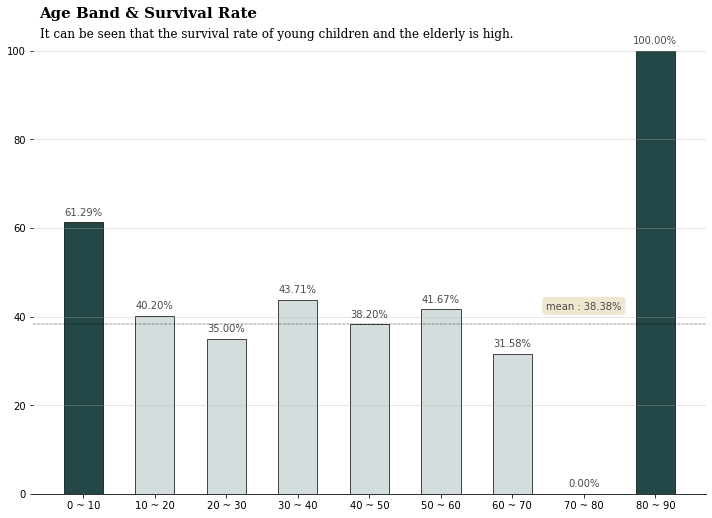

In [ ]:
def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'

data['age_band'] = data['Age'].apply(age_band)
titanic_age = data[['age_band', 'Survived']].groupby('age_band')['Survived'].value_counts().sort_index().unstack().fillna(0)
titanic_age['Survival rate'] = titanic_age[1] / (titanic_age[0] + titanic_age[1]) * 100

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

color_map = ['#d4dddd' for _ in range(9)]
color_map[0] = color_map[8] = '#244747' # color highlight

ax.bar(titanic_age['Survival rate'].index, titanic_age['Survival rate'], 
       color=color_map, width=0.55, 
       edgecolor='black', 
       linewidth=0.7)



for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)


# Annotation Part
for i in titanic_age['Survival rate'].index:
    ax.annotate(f"{titanic_age['Survival rate'][i]:.02f}%", 
                   xy=(i, titanic_age['Survival rate'][i] + 2.3),
                   va = 'center', ha='center',fontweight='light', 
                   color='#4a4a4a')


# mean line + annotation
mean = data['Survived'].mean() *100
ax.axhline(mean ,color='black', linewidth=0.4, linestyle='dashdot')
ax.annotate(f"mean : {mean :.4}%", 
            xy=('70 ~ 80', mean + 4),
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))
    

# Title & Subtitle    
fig.text(0.06, 1, 'Age Band & Survival Rate', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.06, 0.96, 'It can be seen that the survival rate of young children and the elderly is high.', fontsize=12, fontweight='light', fontfamily='serif')

grid_y_ticks = np.arange(0, 101, 20)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='y', linestyle='-', alpha=0.4)

plt.tight_layout()
plt.show()

## Awesome Bar+Scatter Plot (Stripplot)

- A **strip plot** is a scatter plot where one of the variables is categorical. 
- **color theme** : Pantone 1805, Pantone 540

---

### Simple Explanation

- Calculate mean first
- Generate Uniform Distribution
    - Survived = 1, Survived = 0 
- Make a difference using color or luminance or transparency.
- (tips) Add legend
- (tips) Add explanation under the title.

In [ ]:
survival_rate = data.groupby(['Sex']).mean()[['Survived']]
male_rate = survival_rate.loc['male']
female_rate = survival_rate.loc['female']
display(survival_rate)

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
male_pos = np.random.uniform(0, male_rate, len(data[(data['Sex']=='male') & (data['Survived']==1)]))
male_neg = np.random.uniform(male_rate, 1, len(data[(data['Sex']=='male') & (data['Survived']==0)]))
female_pos = np.random.uniform(0, female_rate, len(data[(data['Sex']=='female') & (data['Survived']==1)]))
female_neg = np.random.uniform(female_rate, 1, len(data[(data['Sex']=='female') & (data['Survived']==0)]))

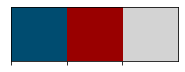

In [ ]:
sns.palplot(['#004c70', '#990000', 'lightgray'])

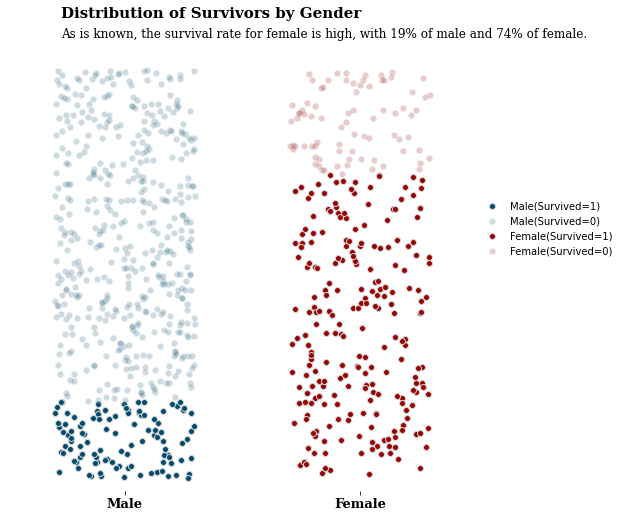

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))

np.random.seed(42)

# Male Stripplot
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_pos)), male_pos, color='#004c70', edgecolor='lightgray', label='Male(Survived=1)')
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_neg)), male_neg, color='#004c70', edgecolor='lightgray', alpha=0.2, label='Male(Survived=0)')

# Female Stripplot
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_pos)), female_pos, color='#990000', edgecolor='lightgray', label='Female(Survived=1)')
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_neg)), female_neg, color='#990000', edgecolor='lightgray', alpha=0.2, label='Female(Survived=0)')

# Set Figure & Axes
ax.set_xlim(-0.5, 2.0)
ax.set_ylim(-0.03, 1.1)

# Ticks
ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'], fontweight='bold', fontfamily='serif', fontsize=13)
ax.set_yticks([], minor=False)
ax.set_ylabel('')

# Spines
for s in ["top","right","left", 'bottom']:
    ax.spines[s].set_visible(False)


# Title & Explanation
fig.text(0.1, 1, 'Distribution of Survivors by Gender', fontweight='bold', fontfamily='serif', fontsize=15)    
fig.text(0.1, 0.96, 'As is known, the survival rate for female is high, with 19% of male and 74% of female.', fontweight='light', fontfamily='serif', fontsize=12)    

ax.legend(loc=(0.8, 0.5), edgecolor='None')
plt.tight_layout()
plt.show()

The survival probability visualization for each pclass using the above method is as follows.

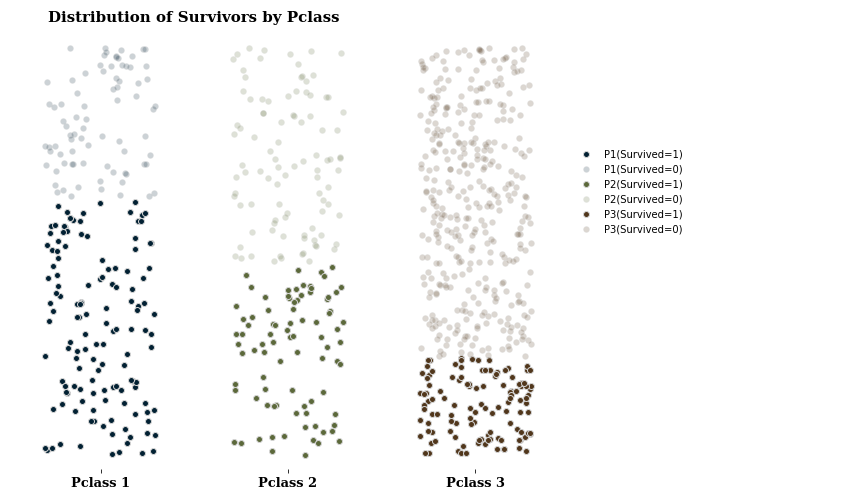

In [ ]:

# You can also make this meta data using for-loop
survival_rate = data.groupby(['Pclass']).mean()[['Survived']]
p1_rate = survival_rate.loc[1]
p2_rate = survival_rate.loc[2]
p3_rate = survival_rate.loc[3]

p1_pos = np.random.uniform(0, p1_rate, len(data[(data['Pclass']==1) & (data['Survived']==1)]))
p1_neg = np.random.uniform(p1_rate, 1, len(data[(data['Pclass']==1) & (data['Survived']==0)]))
p2_pos = np.random.uniform(0, p2_rate, len(data[(data['Pclass']==2) & (data['Survived']==1)]))
p2_neg = np.random.uniform(p2_rate, 1, len(data[(data['Pclass']==2) & (data['Survived']==0)]))
p3_pos = np.random.uniform(0, p3_rate, len(data[(data['Pclass']==3) & (data['Survived']==1)]))
p3_neg = np.random.uniform(p3_rate, 1, len(data[(data['Pclass']==3) & (data['Survived']==0)]))




fig, ax = plt.subplots(1, 1, figsize=(12, 7))

np.random.seed(42)

ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_pos)), p1_pos, color='#022133', edgecolor='lightgray', label='P1(Survived=1)')
ax.scatter(np.random.uniform(-0.3, 0.3, len(p1_neg)), p1_neg, color='#022133', edgecolor='lightgray', alpha=0.2, label='P1(Survived=0)')
ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_pos)), p2_pos, color='#5c693b', edgecolor='lightgray', label='P2(Survived=1)')
ax.scatter(np.random.uniform(1-0.3, 1+0.3, len(p2_neg)), p2_neg, color='#5c693b', edgecolor='lightgray', alpha=0.2, label='P2(Survived=0)')
ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_pos)), p3_pos, color='#51371c', edgecolor='lightgray', label='P3(Survived=1)')
ax.scatter(np.random.uniform(2-0.3, 2+0.3, len(p3_neg)), p3_neg, color='#51371c', edgecolor='lightgray', alpha=0.2, label='P3(Survived=0)')



# # Set Figure & Axes
ax.set_xlim(-0.5, 4.0)
ax.set_ylim(-0.03, 1.1)

# # Ticks
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Pclass 1', 'Pclass 2', 'Pclass 3'], fontweight='bold', fontfamily='serif', fontsize=13)
ax.set_yticks([], minor=False)
ax.set_ylabel('')

# Spines
for s in ["top","right","left", 'bottom']:
    ax.spines[s].set_visible(False)


# Title & Explanation
fig.text(0.06, 0.95, 'Distribution of Survivors by Pclass', fontweight='bold', fontfamily='serif', fontsize=15, ha='left')    


ax.legend(loc=(0.67, 0.5), edgecolor='None')
plt.tight_layout()
plt.show()

## Awesome Heatmap

- A **heat map (or heatmap)** is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions.

---

### Simple Explanation

- (tip) `mask` (remove symetric)
- (tip) `square` (to make x-y scale same)
- (tip) `colormap (diverging colormap)
- (tip) text as watermark


In [ ]:
data['Sex'] = data['Sex'].map({'male':0, 'female':1})
data['Embarked'] = data['Embarked'].fillna('S')
data['Embarked'] = data['Embarked'].map({'S':0, 'C':1, 'Q':2})
data['Family'] = data['SibSp'] + data['Parch']
data = data[[col for col in data.columns if col !='Survived']+ ['Survived']]  
corr = data.corr()
corr

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Survived
PassengerId,1.000000,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658,-0.030467,-0.040143,-0.005007
Pclass,-0.035144,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.045702,0.065997,-0.338481
Sex,-0.042939,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,0.116569,0.200988,0.543351
Age,0.036847,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,0.010171,-0.301914,-0.077221
SibSp,-0.057527,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,-0.059961,0.890712,-0.035322
Parch,-0.001652,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,-0.078665,0.783111,0.081629
Fare,0.012658,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.062142,0.217138,0.257307
Embarked,-0.030467,0.045702,0.116569,0.010171,-0.059961,-0.078665,0.062142,1.000000,-0.080281,0.106811
Family,-0.040143,0.065997,0.200988,-0.301914,0.890712,0.783111,0.217138,-0.080281,1.000000,0.016639
Survived,-0.005007,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,0.106811,0.016639,1.000000


In [ ]:
sns.color_palette(sns.diverging_palette(230, 20))

[(0.2509335357076959, 0.4944143311197457, 0.6104170295454565),
 (0.5266567751883763, 0.6751928585334119, 0.7467240840661897),
 (0.8050726244296104, 0.8577368012538521, 0.884362262166227),
 (0.9140860646530862, 0.8246826885128927, 0.8028133239419792),
 (0.8384144678873866, 0.5785740917778832, 0.5129511551488873),
 (0.7634747047461135, 0.3348456555528834, 0.225892295531744)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


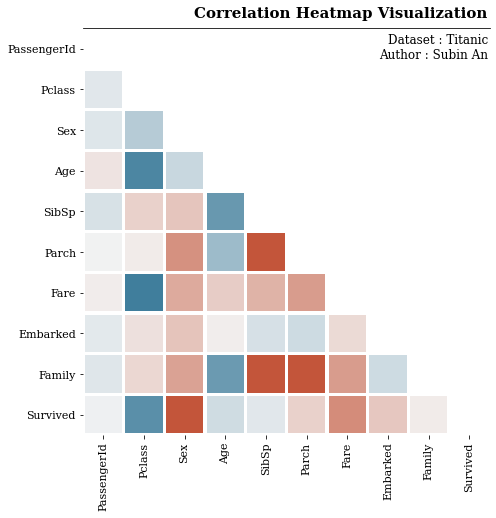

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, 
            square=True, 
            mask=mask,
            linewidth=2.5, 
            vmax=0.4, vmin=-0.4, 
            cmap=cmap, 
            cbar=False, 
            ax=ax)

ax.set_yticklabels(ax.get_xticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.spines['top'].set_visible(True)

fig.text(0.97, 1, 'Correlation Heatmap Visualization', fontweight='bold', fontfamily='serif', fontsize=15, ha='right')    
fig.text(0.97, 0.92, 'Dataset : Titanic\nAuthor : Subin An', fontweight='light', fontfamily='serif', fontsize=12, ha='right')    

plt.tight_layout()
plt.show()

## Awesome Dimension Reduction + Scatter Plot

- UMAP(Dimension Reduction) + Scatterplot

### Simple Explanation

In the past, **dimensional reduction** has been widely used in multidimensional data analysis. 

However, it is seldom used to analyze it after clustering. 

This visualization draws separate graphs based on gender and Pclass based on the clustering results according to survival, so that the distribution of survivors according to the criteria can be viewed differently.

In [ ]:
from umap import UMAP

# Dimension Reduction
survived = data['Survived'] 
data_sub = data.drop(['Survived', 'Ticket', 'Name', 'Cabin', 'age_band'], axis=1).fillna(0)

umap = UMAP(random_state=0)
titanic_umap = umap.fit_transform(data_sub, survived)



ModuleNotFoundError: ignored

NameError: ignored

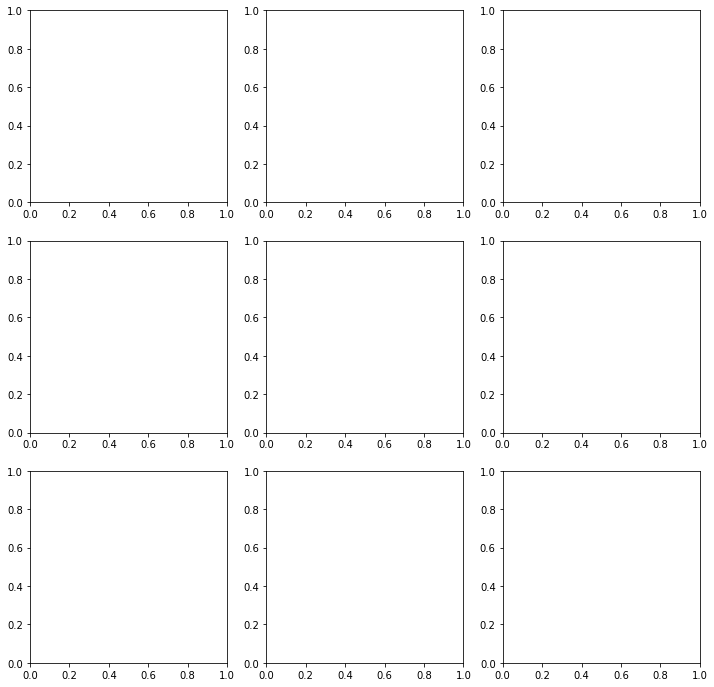

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Survived
axes[0][0].scatter(titanic_umap[data['Survived']==1][:,0], titanic_umap[data['Survived']==1][:,1], c='#8abbd0', alpha=0.25, label='Survived:1')
axes[0][0].scatter(titanic_umap[data['Survived']==0][:,0], titanic_umap[data['Survived']==0][:,1], c='#4a4a4a', alpha=0.25, label='Survived:0')

# Gender
axes[1][0].scatter(titanic_umap[data['Sex']==0][:,0], titanic_umap[data['Sex']==0][:,1], c='#004c70', alpha=0.1, label='Male')
axes[1][1].scatter(titanic_umap[data['Sex']==1][:,0], titanic_umap[data['Sex']==1][:,1], c='#990000', alpha=0.1, label='Female')

# Pclass
axes[2][0].scatter(titanic_umap[data['Pclass']==1][:,0], titanic_umap[data['Pclass']==1][:,1], c="#022133", alpha=0.1, label='Pclass:1')
axes[2][1].scatter(titanic_umap[data['Pclass']==2][:,0], titanic_umap[data['Pclass']==2][:,1], c='#5c693b', alpha=0.1, label='Pclass:2')
axes[2][2].scatter(titanic_umap[data['Pclass']==3][:,0], titanic_umap[data['Pclass']==3][:,1], c='#51371c', alpha=0.1, label='Pclass:3')

for i in range(3):
    for j in range(3):
        axes[i][j].set_xticks([])
        axes[i][j].set_yticks([])
        for s in ["top","right","left", 'bottom']:
            axes[i][j].spines[s].set_visible(False)
        if j <= i : axes[i][j].legend()

            

# Text Part
fig.text(0.97, 1, 'Explore Embedding Space', fontweight='bold', fontfamily='serif', fontsize=20, ha='right')   
fig.text(0.97, 0.975, 'Author : Subin An', fontweight='light', fontfamily='serif', fontsize=12, ha='right')

fig.text(0.97, 0.94, '''
In the past, dimensional reduction has been widely 
used in multidimensional data analysis.
However, it is seldom used to analyze it after clustering. 

This visualization draws separate graphs based on gender and 
Pclass based on the clustering results according to survival, 
so that the distribution of survivors according to the criteria 
can be viewed differently.''', 
         fontweight='light', fontfamily='serif', fontsize=12, va='top', ha='right')   


plt.tight_layout()
plt.show()


### Bad Dimension Reduction Case Example

- using tsne

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=0)
titanic_tsne = tsne.fit_transform(data_sub, survived)

NameError: ignored

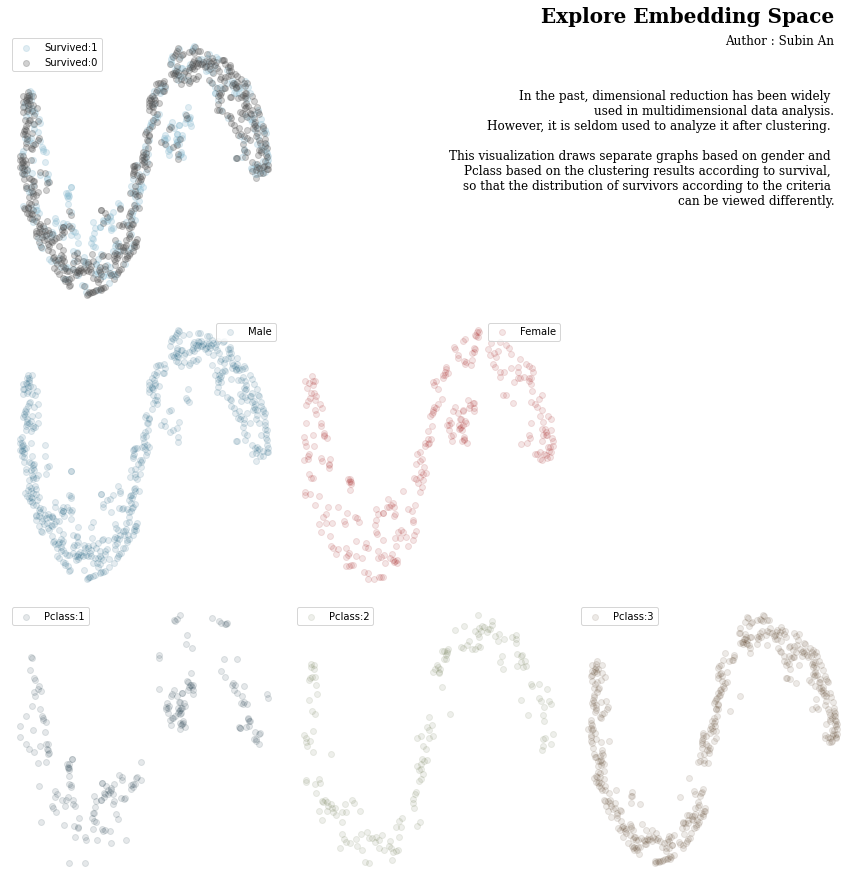

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Survived
axes[0][0].scatter(titanic_tsne[data['Survived']==1][:,0], titanic_tsne[data['Survived']==1][:,1], c='#8abbd0', alpha=0.25, label='Survived:1')
axes[0][0].scatter(titanic_tsne[data['Survived']==0][:,0], titanic_tsne[data['Survived']==0][:,1], c='#4a4a4a', alpha=0.25, label='Survived:0')

# Gender
axes[1][0].scatter(titanic_tsne[data['Sex']==0][:,0], titanic_tsne[data['Sex']==0][:,1], c='#004c70', alpha=0.1, label='Male')
axes[1][1].scatter(titanic_tsne[data['Sex']==1][:,0], titanic_tsne[data['Sex']==1][:,1], c='#990000', alpha=0.1, label='Female')

# Pclass
axes[2][0].scatter(titanic_tsne[data['Pclass']==1][:,0], titanic_tsne[data['Pclass']==1][:,1], c="#022133", alpha=0.1, label='Pclass:1')
axes[2][1].scatter(titanic_tsne[data['Pclass']==2][:,0], titanic_tsne[data['Pclass']==2][:,1], c='#5c693b', alpha=0.1, label='Pclass:2')
axes[2][2].scatter(titanic_tsne[data['Pclass']==3][:,0], titanic_tsne[data['Pclass']==3][:,1], c='#51371c', alpha=0.1, label='Pclass:3')

for i in range(3):
    for j in range(3):
        axes[i][j].set_xticks([])
        axes[i][j].set_yticks([])
        for s in ["top","right","left", 'bottom']:
            axes[i][j].spines[s].set_visible(False)
        if j <= i : axes[i][j].legend()

            

# Text Part
fig.text(0.97, 1, 'Explore Embedding Space', fontweight='bold', fontfamily='serif', fontsize=20, ha='right')   
fig.text(0.97, 0.975, 'Author : Subin An', fontweight='light', fontfamily='serif', fontsize=12, ha='right')

fig.text(0.97, 0.94, '''
In the past, dimensional reduction has been widely 
used in multidimensional data analysis.
However, it is seldom used to analyze it after clustering. 

This visualization draws separate graphs based on gender and 
Pclass based on the clustering results according to survival, 
so that the distribution of survivors according to the criteria 
can be viewed differently.''', 
         fontweight='light', fontfamily='serif', fontsize=12, va='top', ha='right')   


plt.tight_layout()
plt.show()


## Related Work

- [🕶 All You Need is Time-Series Visualization [20+]](https://www.kaggle.com/subinium/all-you-need-is-time-series-visualization-20)
- [Tips for making the Right Visualization](https://www.kaggle.com/subinium/tips-for-making-the-right-visualization)
- [Simple Matplotlib & Visualization Tips 💡](https://www.kaggle.com/subinium/simple-matplotlib-visualization-tips)
- [🛣️ Road to Viz Expert (1) - Unusual tools](https://www.kaggle.com/subinium/road-to-viz-expert-1-unusual-tools)


- [The Economist Color](http://pattern-library.economist.com/color.html)


### Please be sure to leave a reference when using code or taking ideas in my visualizations.

